<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/NASA_MILLING_MACHINE_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*NASA_MILLING_MACHINE*

## PROGNOSTIC MILLING MACHINE SPEED FOR PREDICTIVE/MAINTENANCE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET


In [88]:
df=pd.read_csv("/content/NASA_MILLING_MACHINE/mill.csv")
df.head()

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


# EDA

In [89]:
df.isnull().sum()

Unnamed: 0      0
case            0
run             0
VB             21
time            0
DOC             0
feed            0
material        0
smcAC           0
smcDC           0
vib_table       0
vib_spindle     0
AE_table        0
AE_spindle      0
dtype: int64

In [90]:
df=df.drop('Unnamed: 0',axis=1)
df

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,16,2,NaN,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
164,16,4,NaN,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


## Measurements for VB were not taken after each run so made to zero

In [91]:
df = df.replace(np.nan, 0)
df

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,0.00,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,0.00,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,0.00,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,16,2,0.00,2,1.5,0.5,2,-0.583496,1.308594,0.063477,0.330811,0.093994,0.109253
163,16,3,0.24,3,1.5,0.5,2,-0.200195,1.406250,0.065918,0.279541,0.114746,0.139771
164,16,4,0.00,4,1.5,0.5,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
165,16,5,0.40,6,1.5,0.5,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746


# CHECKING INFORMATION OF DATASET

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         167 non-null    int64  
 1   run          167 non-null    int64  
 2   VB           167 non-null    float64
 3   time         167 non-null    int64  
 4   DOC          167 non-null    float64
 5   feed         167 non-null    float64
 6   material     167 non-null    int64  
 7   smcAC        167 non-null    float64
 8   smcDC        167 non-null    float64
 9   vib_table    167 non-null    float64
 10  vib_spindle  167 non-null    float64
 11  AE_table     167 non-null    float64
 12  AE_spindle   167 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.1 KB


# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [93]:
df.describe()

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,8.329341,7.167665,0.29515,26.113772,1.032934,0.372754,1.347305,-0.164495,1.336546e+00,7.948459e-02,0.285652,1.004229e-01,0.123872
std,4.764886,4.969367,0.26813,23.292643,0.364616,0.125356,0.477546,0.357721,1.893880e-01,3.654218e-02,0.030758,2.469953e-02,0.021194
min,1.000000,1.000000,0.00000,0.000000,0.750000,0.250000,1.000000,-0.798340,2.084677e-33,1.054677e-08,0.000003,4.074626e-11,0.000003
25%,3.000000,3.000000,0.09000,7.500000,0.750000,0.250000,1.000000,-0.551758,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,10.000000,6.000000,0.24000,19.000000,0.750000,0.250000,1.000000,-0.156250,1.372070e+00,6.835938e-02,0.284424,1.019287e-01,0.122070
75%,12.000000,10.000000,0.44000,39.000000,1.500000,0.500000,2.000000,0.206299,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,16.000000,23.000000,1.53000,105.000000,1.500000,0.500000,2.000000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


# skewness check

In [94]:
df.skew(axis = 0, skipna = True)

case          -0.225366
run            0.890411
VB             1.428824
time           1.091929
DOC            0.511123
feed           0.036260
material       0.647249
smcAC         -0.109479
smcDC         -5.225734
vib_table      2.635057
vib_spindle   -4.478552
AE_table      -1.863550
AE_spindle    -0.755054
dtype: float64

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed


**some of the response varibles is highly skewed,so need to normalize our response varibles**

# correlation check

In [95]:
x_corr = df.corr()
x_corr

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.047886,0.158083,-0.109221,-0.160580,-0.194160,0.473620,-0.058081,0.162363,-0.477796,-0.182004,-0.029627,-0.110367
run,-0.047886,1.000000,0.583159,0.941573,-0.248264,-0.129943,-0.303920,-0.024212,0.204143,0.133830,-0.089062,0.105327,0.031430
VB,0.158083,0.583159,1.000000,0.502690,-0.029782,-0.072689,0.176017,-0.051598,0.208382,-0.064528,-0.146942,0.072403,0.015231
time,-0.109221,0.941573,0.502690,1.000000,-0.258633,-0.156453,-0.443332,0.007973,0.206681,0.239667,-0.127997,0.184416,0.147960
DOC,-0.160580,-0.248264,-0.029782,-0.258633,1.000000,0.174614,-0.048788,0.021207,-0.148442,-0.096102,0.210296,0.024933,-0.059588
feed,-0.194160,-0.129943,-0.072689,-0.156453,0.174614,1.000000,-0.037209,0.104865,-0.198365,-0.233306,0.087499,-0.134397,-0.211765
material,0.473620,-0.303920,0.176017,-0.443332,-0.048788,-0.037209,1.000000,-0.010944,0.107970,-0.296074,0.006835,-0.282081,-0.256921
smcAC,-0.058081,-0.024212,-0.051598,0.007973,0.021207,0.104865,-0.010944,1.000000,-0.047164,0.161031,-0.034614,-0.026528,-0.068505
smcDC,0.162363,0.204143,0.208382,0.206681,-0.148442,-0.198365,0.107970,-0.047164,1.000000,0.095938,0.311706,0.195128,0.300523
vib_table,-0.477796,0.133830,-0.064528,0.239667,-0.096102,-0.233306,-0.296074,0.161031,0.095938,1.000000,0.077093,0.265829,0.383685


# correlograms

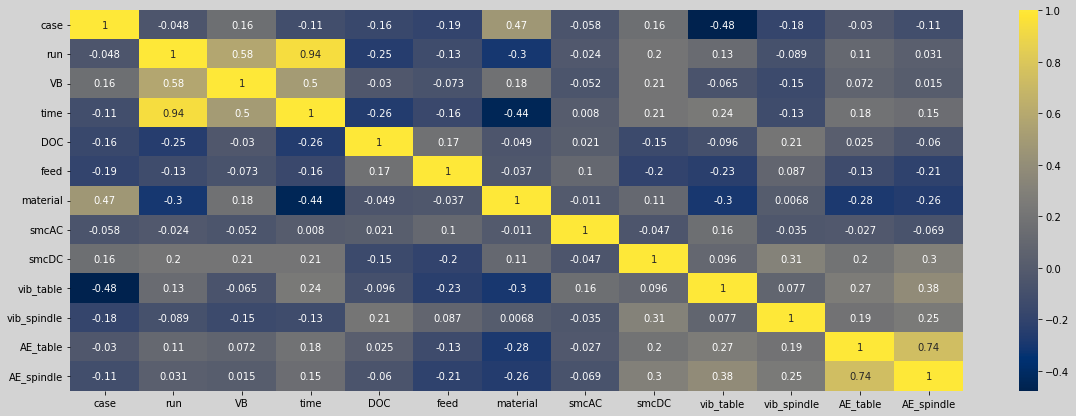

In [96]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='cividis');
plt.show()

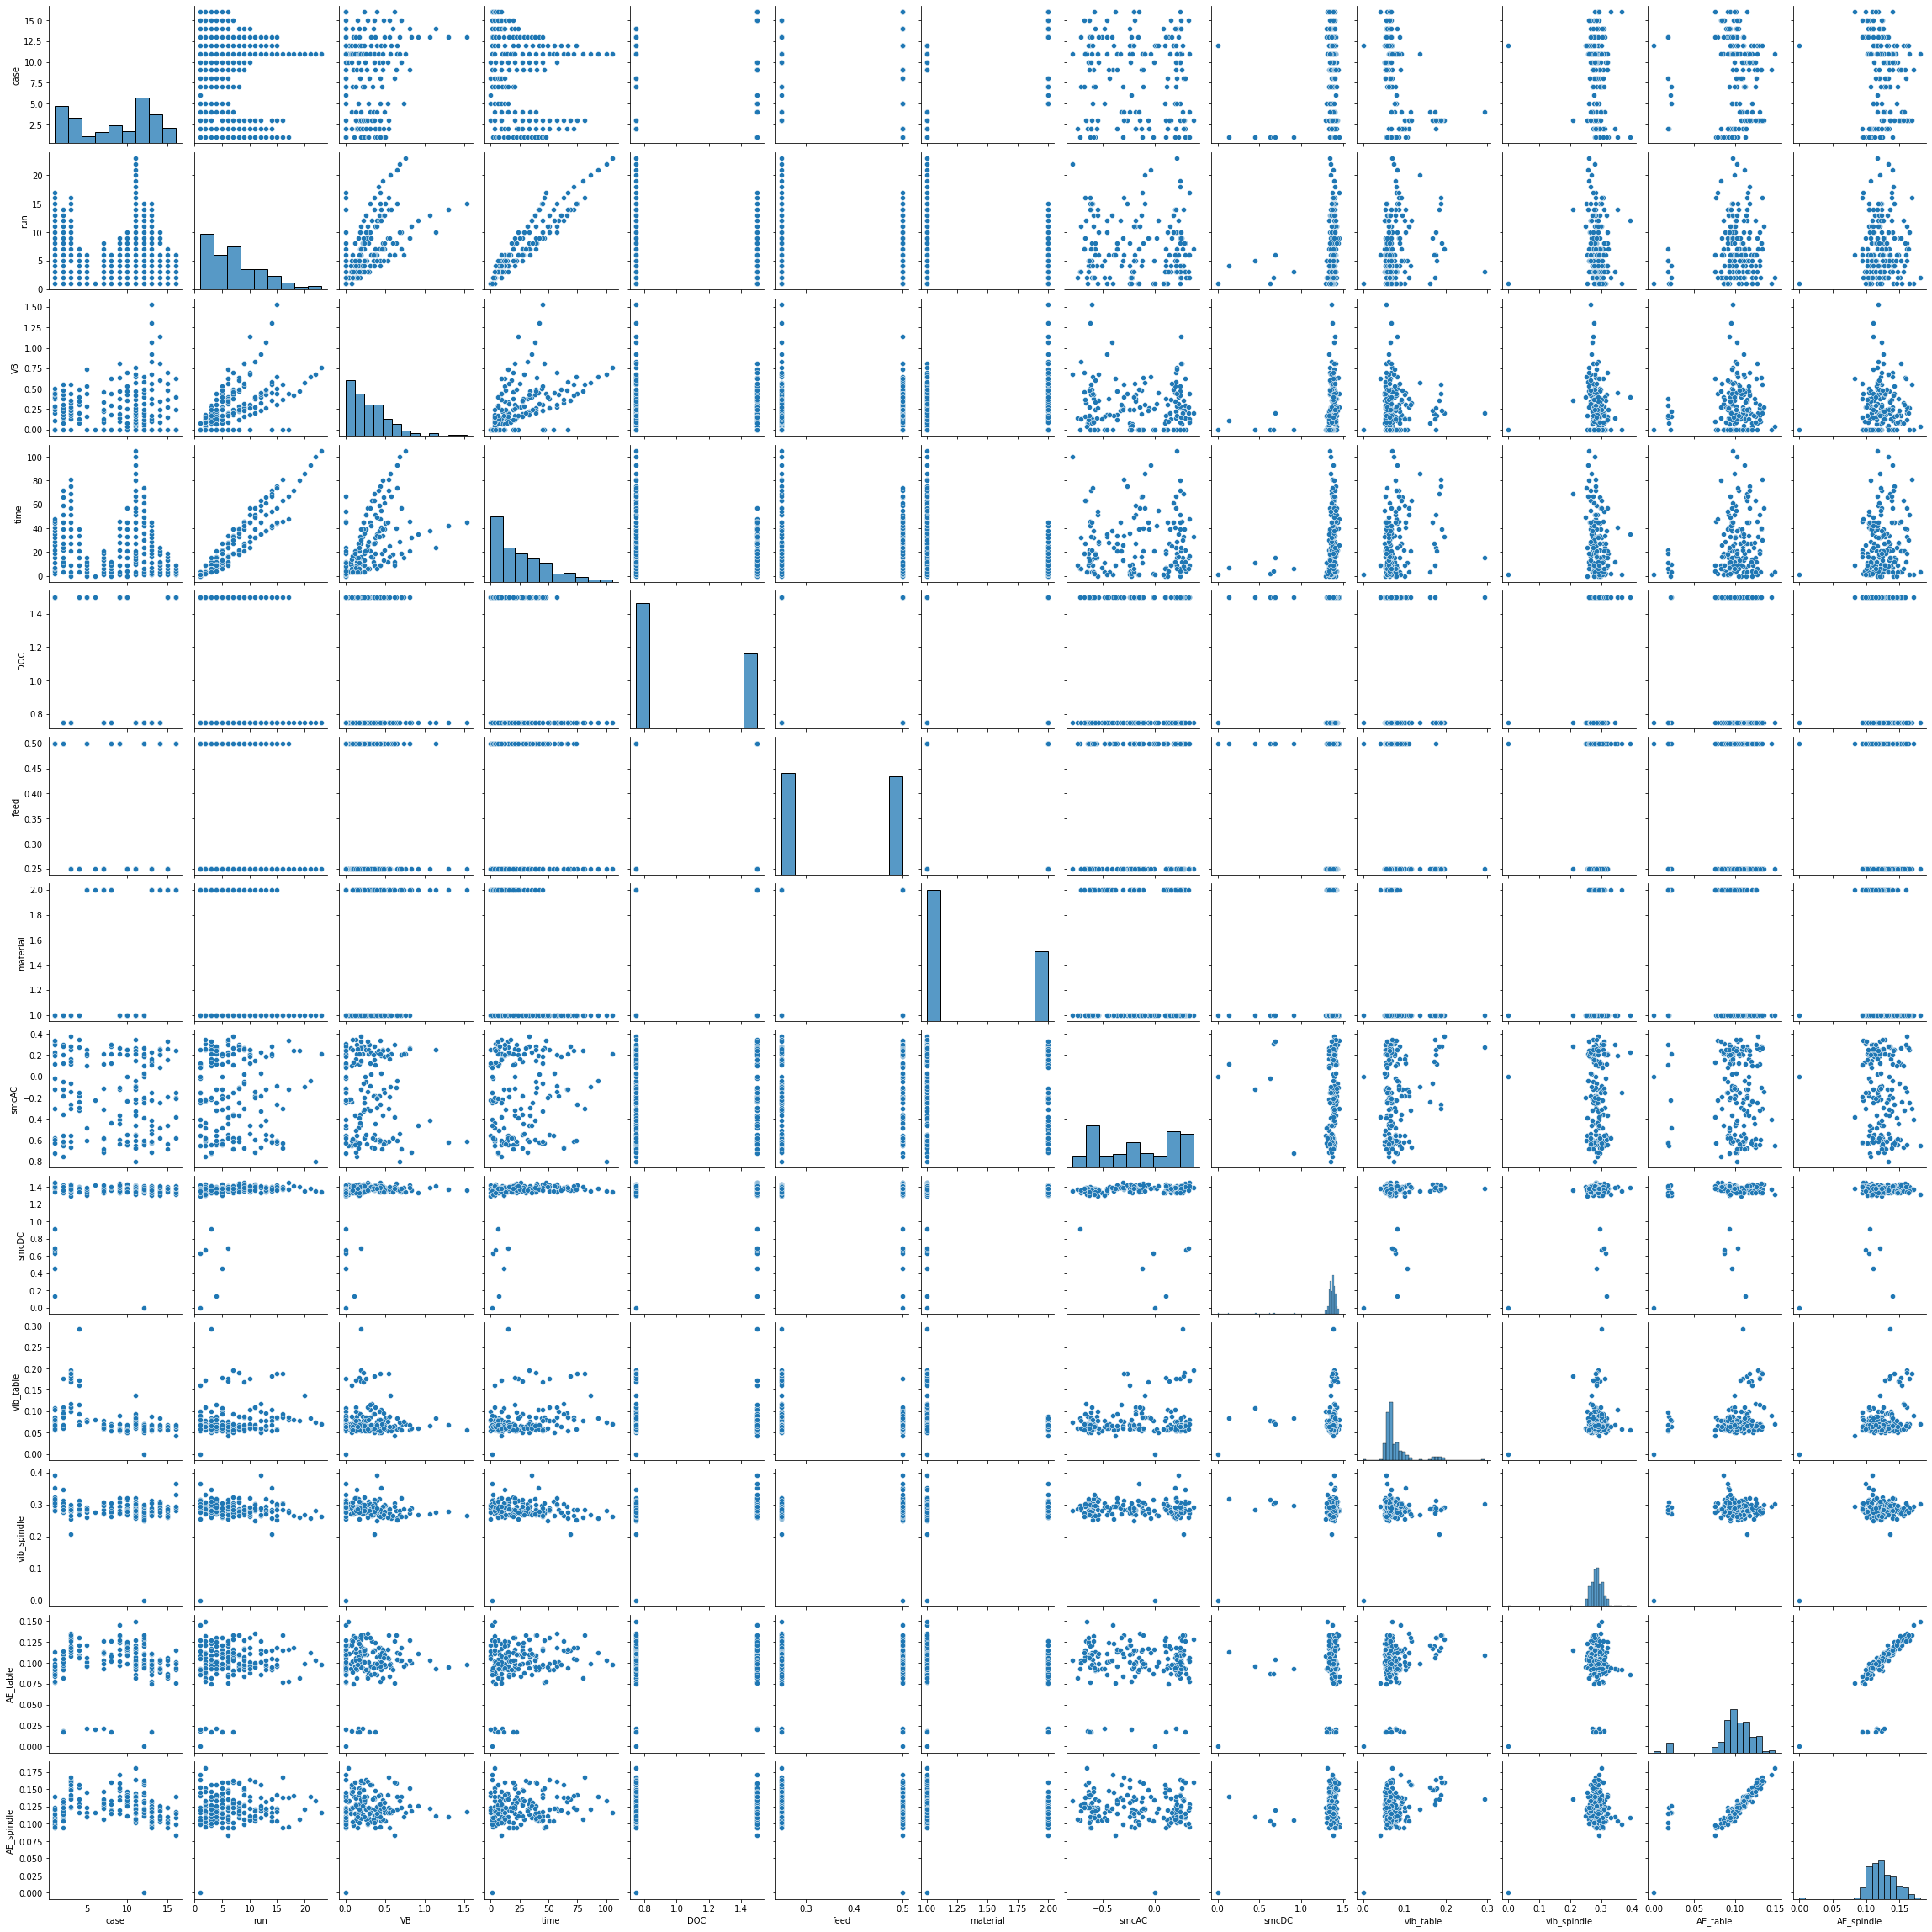

In [97]:
sns.pairplot(df);

# visualization using seaborn

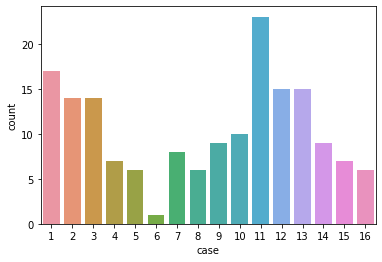

In [98]:
sns.countplot(df['case']);

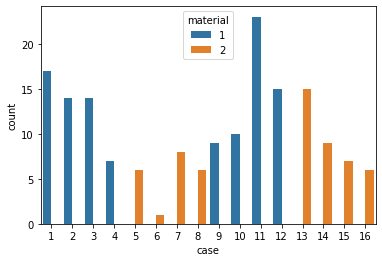

In [99]:
sns.countplot(df['case'],hue=df['material']);

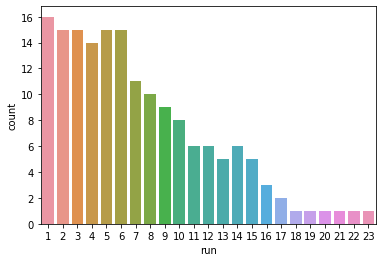

In [100]:
sns.countplot(df['run']);

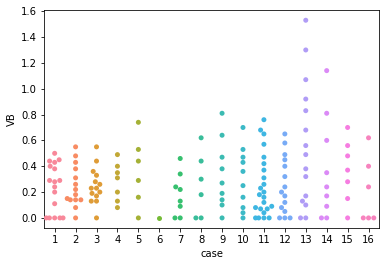

In [101]:
sns.swarmplot(x="case", y="VB", data=df);

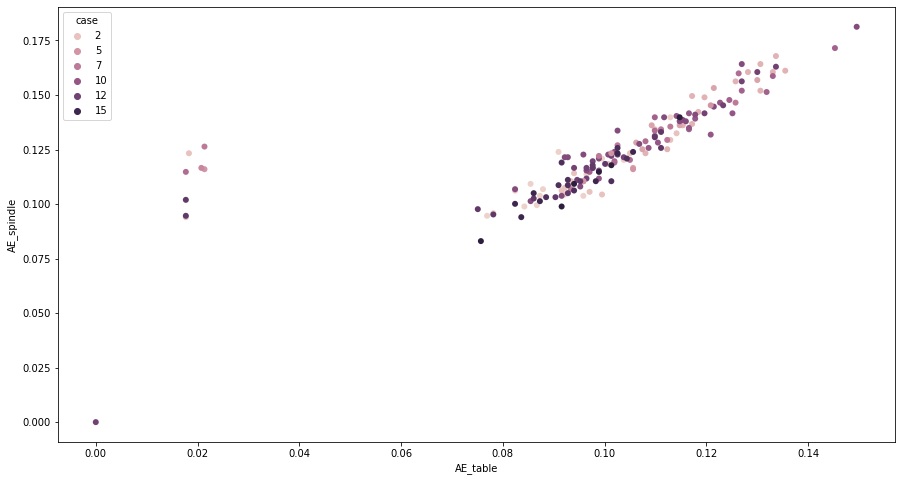

In [102]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="AE_table", y="AE_spindle",hue="case",linewidth=0,data=df);

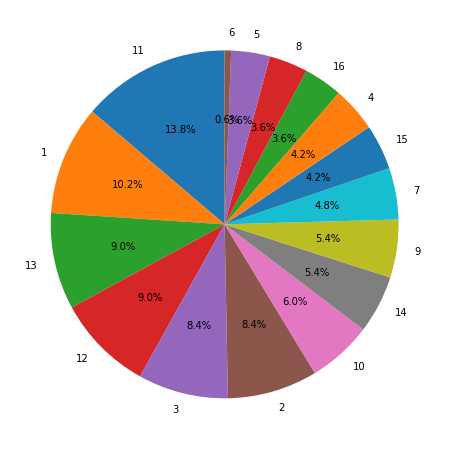

In [103]:
sorted_counts=df["case"].value_counts()
plt.figure(figsize=(12,8))
plt.pie(sorted_counts,labels=sorted_counts.index,shadow=False,autopct='%.1f%%',startangle=90)
plt.show()

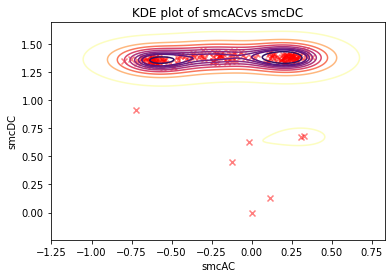

In [104]:
sns.kdeplot(df['smcAC'], df['smcDC'], cmap='magma_r')
plt.scatter(df['smcAC'], df['smcDC'], marker='x', color='r', alpha=0.5)
plt.xlabel('smcAC')
plt.ylabel('smcDC')
plt.title('KDE plot of smcACvs smcDC')
plt.show()

## DISTINGUISHING CONTINOUS AND CATEGORICAL FIELDS

In [105]:
cat_cols = df.select_dtypes(include = 'object')
num_cols =df.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['case', 'run', 'VB', 'time', 'DOC', 'feed', 'material', 'smcAC',
       'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle'],
      dtype='object')
Categorical Columns are :  Index([], dtype='object')


## USING BOXPLOT TO FIND OUTLIERS 

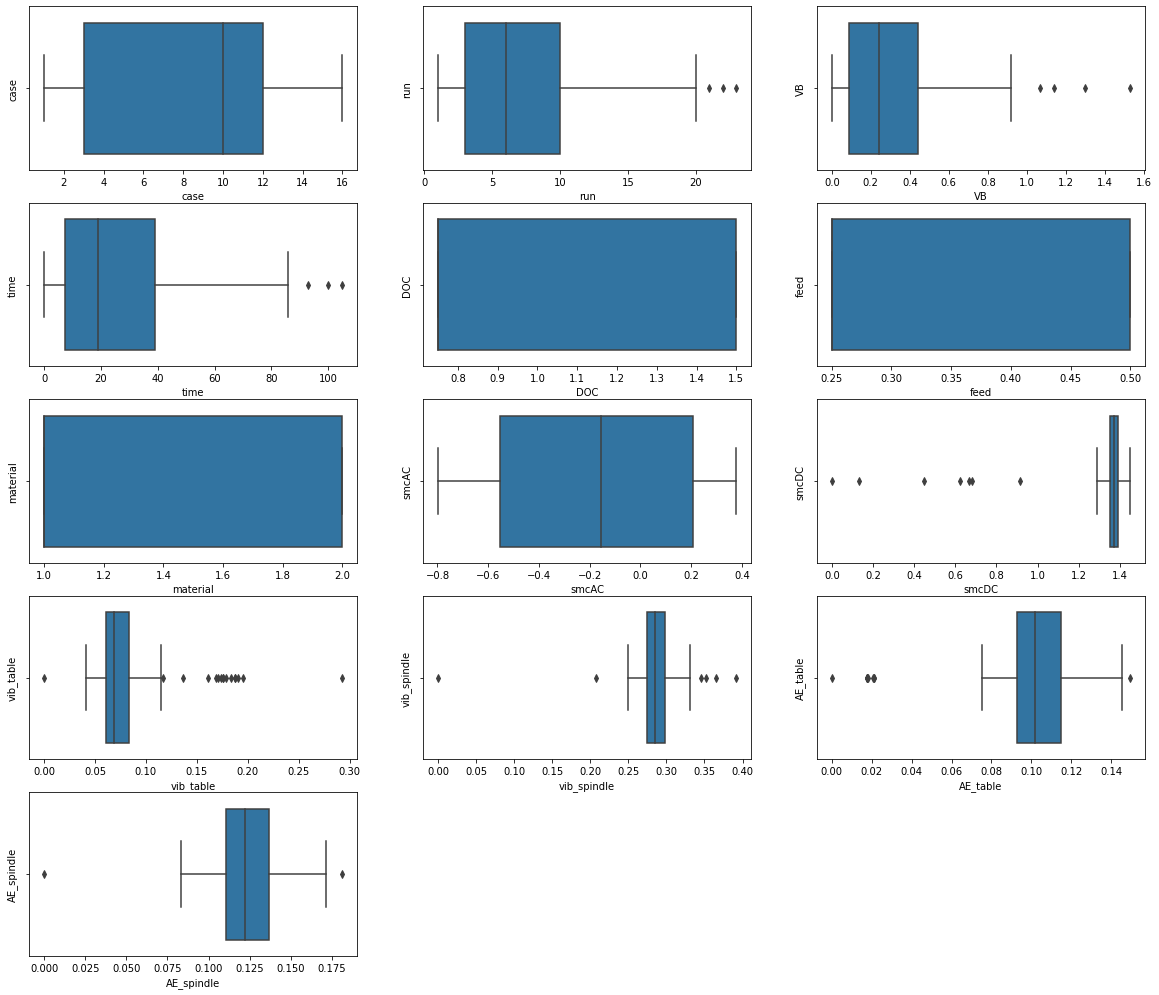

In [106]:
plt.figure(figsize=(20,50))
for i,col in enumerate(num_cols,1):
     plt.subplot(14,3,i)
     sns.boxplot(df[col])
     plt.ylabel(col)
plt.show()

# outliers removal using IQR

In [107]:
def removeOutliers(df, col):
    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1
     
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = df.loc[df[col].isin(outlier_free_list)]
 
 
for i in df.columns:
    removeOutliers(df, i)
 
# Assigning filtered data back to our original variable
df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column case is: 9.0
IQR value for column run is: 7.0
IQR value for column VB is: 0.35
IQR value for column time is: 31.5
IQR value for column DOC is: 0.75
IQR value for column feed is: 0.25
IQR value for column material is: 1.0
IQR value for column smcAC is: 0.758056640625
IQR value for column smcDC is: 0.04150390625
IQR value for column vib_table is: 0.02197265625
IQR value for column vib_spindle is: 0.023193359375
IQR value for column AE_table is: 0.02197265625
IQR value for column AE_spindle is: 0.02593994140625
Shape of data after outlier removal is:  (165, 13)



# creating target and response variable for model building

In [108]:
x_ind=df.drop('case',axis=1)
y_dep=df.case

# NORMALIZATION OF RESPONSE VARIABLE

In [109]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()

In [110]:
x_norm=norm.fit_transform(x_ind)

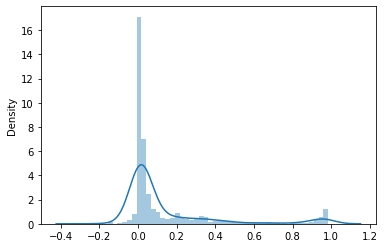

In [111]:
sns.distplot(x_norm);

# model data selection for train and validation phase

In [145]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=2)

# To perform multiclass classification need interpretable classifier that can handle missing data,Less Prone to Overfitting,Less Prone to Overfitting and Less Prone to Overfitting

## NAIVE-BAYES CLASSIFIER

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
model_NB=GaussianNB()

In [148]:
model_NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [149]:
y_pred = model_NB.predict(x_test)
y_pred

array([ 3,  2,  3, 15,  1,  1,  1, 14, 10, 12,  1,  7, 11, 13, 15,  1,  3,
        3,  4,  1,  2, 14, 13,  4,  2,  5, 10, 16, 13, 13,  1,  2, 12])

# CONFUSION MATRIX AND ACCURACY OF LOGISTICS REGRESSION

In [150]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [151]:
cnf=confusion_matrix(y_test,y_pred)

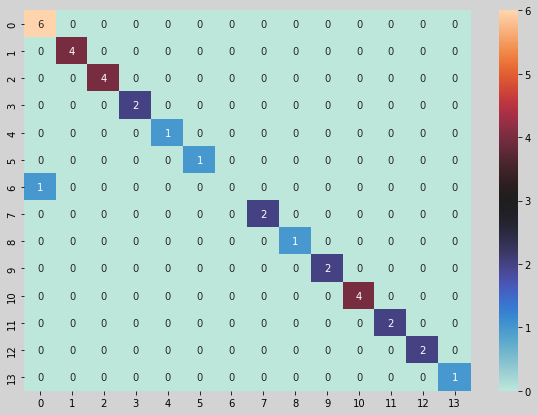

In [152]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='icefire');
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [153]:
accuracy_score(y_test,y_pred) * 100

96.96969696969697

# Classification Report

In [154]:
from sklearn.metrics import classification_report

In [155]:
Rep=classification_report(y_test,y_pred)
print(Rep)

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1

    accuracy                           0.97        33
   macro avg       0.92      0.93      0.92        33
weighted avg       0.94      0.97      0.96        33



## THE PREDICTED NAIVE BAYES CLASSIFICATION MODEL FOR 16 CASES OF RUN  IN MILL DATASET HAS ACCURACY OF 97% 